In [1]:
DATA_DIR = "../data/simulation"

In [2]:
# !du -sh ~

In [3]:
import glob
import pandas as pd

# Pattern for all summary.txt files in subfolders
pattern = "../data/simulation/scope_output/*/summary.txt"

# Get file paths
filepaths = glob.glob(pattern)

# Create a list of dicts with filepath and file contents
data = []
for path in filepaths:
    try:
        with open(path, 'r') as f:
            content = f.read().strip()
        data.append({"filepath": path, "summary": content})
    except Exception as e:
        print(f"Error reading {path}: {e}")

# Convert to DataFrame
df = pd.DataFrame(data)

# Show result
print(df.head())
print(f"\nTotal files read: {len(df)}")

                                            filepath  \
0  ../data/simulation/scope_output/n10000_m15_siz...   
1  ../data/simulation/scope_output/n1000_m10_size...   
2  ../data/simulation/scope_output/n1000_m10_size...   
3  ../data/simulation/scope_output/n1000_m15_size...   
4  ../data/simulation/scope_output/n10000_m10_siz...   

                                   summary  
0  #UNIQUE SOLUTIONS: 2 WITH VALUE 15255.0  
1    #UNIQUE SOLUTIONS: 5 WITH VALUE 954.0  
2   #UNIQUE SOLUTIONS: 5 WITH VALUE 1009.0  
3   #UNIQUE SOLUTIONS: 5 WITH VALUE 1562.0  
4   #UNIQUE SOLUTIONS: 1 WITH VALUE 5017.0  

Total files read: 1089


In [4]:
df

,filepath,summary
0,../data/simulation/scope_output/n10000_m15_siz...,#UNIQUE SOLUTIONS: 2 WITH VALUE 15255.0
1,../data/simulation/scope_output/n1000_m10_size...,#UNIQUE SOLUTIONS: 5 WITH VALUE 954.0
2,../data/simulation/scope_output/n1000_m10_size...,#UNIQUE SOLUTIONS: 5 WITH VALUE 1009.0
3,../data/simulation/scope_output/n1000_m15_size...,#UNIQUE SOLUTIONS: 5 WITH VALUE 1562.0
4,../data/simulation/scope_output/n10000_m10_siz...,#UNIQUE SOLUTIONS: 1 WITH VALUE 5017.0
...,...,...
1084,../data/simulation/scope_output/n5000_m5_size5...,#UNIQUE SOLUTIONS: 1 WITH VALUE 2553.0
1085,../data/simulation/scope_output/n10000_m5_size...,#UNIQUE SOLUTIONS: 1 WITH VALUE 5036.0
1086,../data/simulation/scope_output/n10000_m10_siz...,#UNIQUE SOLUTIONS: 1 WITH VALUE 1009.0
1087,../data/simulation/scope_output/n5000_m15_size...,#UNIQUE SOLUTIONS: 5 WITH VALUE 15044.0


In [5]:
import re
import pandas as pd

# Example: assume df["content"] already exists
pattern = r"#UNIQUE SOLUTIONS:\s*(\d+)\s*WITH VALUE\s*([-\w\.]+)"

# Apply regex extraction
df[["unique_solutions", "value"]] = (
    df["summary"].str.extract(pattern)
)

# Convert numeric columns if possible
df["unique_solutions"] = pd.to_numeric(df["unique_solutions"], errors="coerce")
df["value"] = pd.to_numeric(df["value"], errors="coerce")

# View result
print(df.head())


                                            filepath  \
0  ../data/simulation/scope_output/n10000_m15_siz...   
1  ../data/simulation/scope_output/n1000_m10_size...   
2  ../data/simulation/scope_output/n1000_m10_size...   
3  ../data/simulation/scope_output/n1000_m15_size...   
4  ../data/simulation/scope_output/n10000_m10_siz...   

                                   summary  unique_solutions    value  
0  #UNIQUE SOLUTIONS: 2 WITH VALUE 15255.0                 2  15255.0  
1    #UNIQUE SOLUTIONS: 5 WITH VALUE 954.0                 5    954.0  
2   #UNIQUE SOLUTIONS: 5 WITH VALUE 1009.0                 5   1009.0  
3   #UNIQUE SOLUTIONS: 5 WITH VALUE 1562.0                 5   1562.0  
4   #UNIQUE SOLUTIONS: 1 WITH VALUE 5017.0                 1   5017.0  


In [6]:
df_0 = df[df['unique_solutions'] == 0]
df_0

,filepath,summary,unique_solutions,value
26,../data/simulation/scope_output/n1000_m15_size...,#UNIQUE SOLUTIONS: 0 WITH VALUE None,0,NaN
31,../data/simulation/scope_output/n1000_m10_size...,#UNIQUE SOLUTIONS: 0 WITH VALUE None,0,NaN
182,../data/simulation/scope_output/n1000_m10_size...,#UNIQUE SOLUTIONS: 0 WITH VALUE None,0,NaN
224,../data/simulation/scope_output/n1000_m5_size1...,#UNIQUE SOLUTIONS: 0 WITH VALUE None,0,NaN
333,../data/simulation/scope_output/n1000_m10_size...,#UNIQUE SOLUTIONS: 0 WITH VALUE None,0,NaN
406,../data/simulation/scope_output/n1000_m10_size...,#UNIQUE SOLUTIONS: 0 WITH VALUE None,0,NaN
553,../data/simulation/scope_output/n1000_m10_size...,#UNIQUE SOLUTIONS: 0 WITH VALUE None,0,NaN
767,../data/simulation/scope_output/n1000_m10_size...,#UNIQUE SOLUTIONS: 0 WITH VALUE None,0,NaN
792,../data/simulation/scope_output/n1000_m10_size...,#UNIQUE SOLUTIONS: 0 WITH VALUE None,0,NaN
821,../data/simulation/scope_output/n1000_m10_size...,#UNIQUE SOLUTIONS: 0 WITH VALUE None,0,NaN


In [7]:
# df_0['filepath'][75]

In [8]:
# !cat ../data/simulation/scope_output/n5000_m15_size1000_cov0.02_p5_s4/log

In [9]:
# import os
# import shutil

# for path in df_0["filepath"]:
#     folder = os.path.dirname(path)  # get parent folder
#     if os.path.exists(folder):
#         print(f"Deleting: {folder}")
#         shutil.rmtree(folder)

In [10]:
df['unique_solutions'].value_counts()

unique_solutions
5    655
1    317
2     78
0     15
3     15
4      9
Name: count, dtype: int64

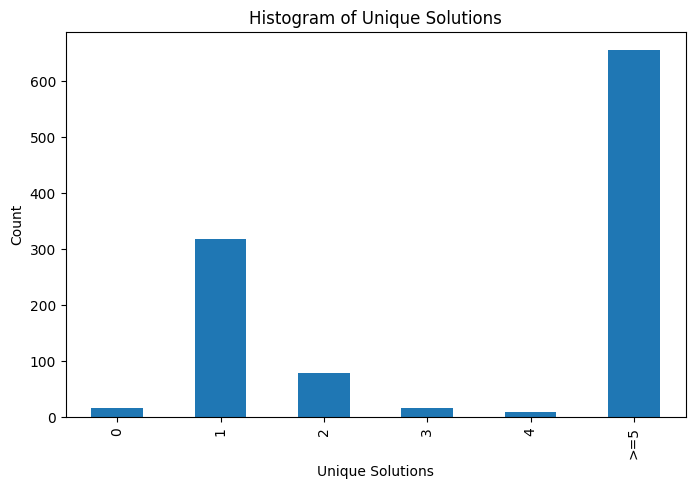

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define bins and labels
bins = list(range(0, 6)) + [np.inf]   # 0–1, 1–2, ..., 10+
labels = [str(i) for i in range(0, 5)] + [">=5"]

# Bin the values
df["unique_solutions_bin"] = pd.cut(
    df["unique_solutions"],
    bins=bins,
    labels=labels,
    right=False
)

# Ensure all bins are represented (even empty ones)
counts = df["unique_solutions_bin"].value_counts().reindex(labels, fill_value=0)

# Plot
counts.plot(kind="bar", figsize=(8,5))
plt.title("Histogram of Unique Solutions")
plt.xlabel("Unique Solutions")
plt.ylabel("Count")
plt.show()


In [9]:
print(df['filepath'][0])

../data/simulation/scope_output/n10000_m15_size1000_cov0.05_p5_s0/summary.txt


In [21]:
!cat ../data/simulation/scope_output/n10000_m15_size1000_cov0.02_p15_s2/summary.txt

#UNIQUE SOLUTIONS: 1 WITH VALUE 14224.0


## Correctness of solution

In [56]:
SIMULATION_STR = "n1000_m5_size100_cov0.1_p5_s1"

GROUND_TRUTH_DIR = f"../data/simulation/ground_truth/{SIMULATION_STR}"
SCOPE_OUTPUT_DIR = f"../data/simulation/scope_output/{SIMULATION_STR}"

## Are clusters in correct order??

In [57]:
import pandas as pd
import numpy as np

In [58]:
char_matrix = pd.read_parquet(f"{GROUND_TRUTH_DIR}/sim_character_matrix_without_noise.parquet")
char_matrix

,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,...,m515,m516,m517,m518,m519,m520,m521,m522,m523,cluster_id
s0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
s1,1,0,0,1,1,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,3
s2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
s3,1,0,0,1,1,1,1,1,0,1,...,1,0,1,1,1,1,0,0,0,3
s4,1,0,0,1,1,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s995,1,0,0,1,1,1,1,1,0,1,...,1,0,1,1,1,1,0,0,0,3
s996,1,0,0,1,1,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,2
s997,1,1,0,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,0,0,3
s998,1,0,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,0,1,1,3


In [59]:
B_truth = pd.read_parquet(f"{GROUND_TRUTH_DIR}/sim_multi_state_tree_node_character_matrix.parquet")
B_truth

,c0,c1,c2,c3,c4,cluster_id
root,0,0,0,0,0,0
d1,0,0,0,0,0,1
c0,1,0,0,0,0,1
d2,1,0,0,0,0,2
d3,1,0,0,0,0,3
c1,1,1,0,0,0,3
c2,1,1,1,0,0,3
c3,1,1,0,1,0,3
c4,1,1,0,1,1,3
d4,1,1,0,1,0,4


In [60]:
!ls "../data/simulation/ground_truth/n10000_m15_size500_cov0.02_p10_s0"

sim.benchmark
sim_character_matrix.parquet
sim_character_matrix_without_noise.parquet
sim_clone_cluster_cell_fractions.svg
sim_cn_tree.svg
sim_copy_numbers.parquet
sim.err.log
sim.log
sim_merged_tree.svg
sim_multi_state_character_matrix.parquet
sim_multi_state_tree_node_character_matrix.parquet
sim_mutation_group.parquet
sim_mutation_to_bin_mapping.parquet
sim_read_count.parquet
sim_read_count_without_missing.parquet
sim_spectral_clustering.svg
sim_tree.dot
sim_tree_edgelist.csv
sim_tree.newick
sim_T.svg
sim_variant_count.parquet
sim_variant_count_without_missing.parquet


In [61]:
Tree = pd.read_csv(f"{GROUND_TRUTH_DIR}/sim_tree_edgelist.csv", header=None)
Tree

,0,1
0,root,d1
1,root,s5
2,root,s10
3,root,s21
4,root,s24
...,...,...
1004,d4,s972
1005,d4,s979
1006,d4,s984
1007,d4,s985


In [62]:
num_mutations = B_truth.shape[1] - 1
num_mutations

5

In [63]:
Tree_mut = Tree[~Tree[1].str.startswith('s')]
Tree_mut

,0,1
0,root,d1
120,d1,c0
219,c0,d2
220,c0,d3
403,d3,c1
490,c1,c2
491,c1,c3
688,c3,c4
689,c3,d4


In [64]:
X = pd.read_csv(f"{SCOPE_OUTPUT_DIR}/solution_0/X.csv", index_col=0).astype(int)
X

,0
0,1
1,1
2,1
3,1
4,1


In [65]:
predicted_B = pd.read_csv(f"{SCOPE_OUTPUT_DIR}/solution_0/B.csv", index_col=0).astype(int)
predicted_B

,0,1,2,3,4
0,0,0,0,0,0
1,1,0,0,0,0
2,1,1,0,0,0
3,1,1,0,1,0
4,1,1,1,1,0
5,1,0,0,0,1
A,0,0,0,0,0
B,0,0,0,0,0
C,1,0,0,0,0
D,1,0,0,0,0


In [66]:
import networkx as nx

In [67]:
T_truth = nx.DiGraph()

for index, row in Tree_mut.iterrows():
    parent, child = row[0], row[1]
    T_truth.add_edge(parent, child)
    

In [68]:
T_truth.edges

OutEdgeView([('root', 'd1'), ('d1', 'c0'), ('c0', 'd2'), ('c0', 'd3'), ('d3', 'c1'), ('c1', 'c2'), ('c1', 'c3'), ('c3', 'c4'), ('c3', 'd4')])

In [69]:
total = 0
correct = 0

for i in range(num_mutations):
    for j in range(num_mutations):
        if i != j and nx.has_path(T_truth, f"c{i}", f"c{j}"):
            total += 1
            print(i, '->' ,j)
            # How has scope predicted?
            if X.iloc[i, 0] and X.iloc[j, 0]:
                is_predicted_correctly = np.all(predicted_B.iloc[:, i] >= predicted_B.iloc[:, j])
                if is_predicted_correctly:
                    correct += 1

print(total, correct, correct / total)

0 -> 1
0 -> 2
0 -> 3
0 -> 4
1 -> 2
1 -> 3
1 -> 4
3 -> 4
8 6 0.75


In [70]:
def find_accuracy(SIMULATION_STR):

    GROUND_TRUTH_DIR = f"../data/simulation/ground_truth/{SIMULATION_STR}"
    SCOPE_OUTPUT_DIR = f"../data/simulation/scope_output/{SIMULATION_STR}"

    Tree = pd.read_csv(f"{GROUND_TRUTH_DIR}/sim_tree_edgelist.csv", header=None)
    X = pd.read_csv(f"{SCOPE_OUTPUT_DIR}/solution_0/X.csv", index_col=0).astype(int)

    Tree_mut = Tree[~Tree[1].str.startswith('s')]

    T_truth = nx.DiGraph()

    for index, row in Tree_mut.iterrows():
        parent, child = row[0], row[1]
        T_truth.add_edge(parent, child)

    total = 0
    correct = 0

    for i in range(num_mutations):
        for j in range(num_mutations):
            if i != j and nx.has_path(T_truth, f"c{i}", f"c{j}"):
                total += 1
                # How has scope predicted?
                if X.iloc[i, 0] and X.iloc[j, 0]:
                    is_predicted_correctly = np.all(predicted_B.iloc[:, i] >= predicted_B.iloc[:, j])
                    if is_predicted_correctly:
                        correct += 1

    return total, correct, correct / total

In [75]:
import os

base_path = "../data/simulation/scope_output"

folders = [
    name
    for name in os.listdir(base_path)
    if os.path.isdir(os.path.join(base_path, name))
]

print(folders)

['n10000_m15_size1000_cov0.02_p15_s2', 'n1000_m10_size100_cov0.02_p5_s4', 'n1000_m10_size100_cov0.02_p5_s0', 'n1000_m15_size100_cov0.1_p5_s3', 'n10000_m10_size500_cov0.1_p15_s2', 'n10000_m5_size1000_cov0.1_p15_s2', 'n10000_m15_size1000_cov0.05_p5_s0', 'n1000_m5_size500_cov0.1_p5_s3', 'n5000_m15_size500_cov0.05_p10_s3', 'n10000_m5_size1000_cov0.05_p5_s3', 'n1000_m5_size1000_cov0.05_p15_s4', 'n5000_m15_size100_cov0.05_p15_s3', 'n10000_m10_size500_cov0.02_p5_s0', 'n5000_m15_size500_cov0.02_p5_s1', 'n5000_m15_size100_cov0.02_p5_s3', 'n1000_m5_size500_cov0.1_p10_s1', 'n5000_m15_size100_cov0.1_p15_s1', 'n5000_m10_size100_cov0.02_p10_s3', 'n1000_m10_size100_cov0.1_p5_s3', 'n1000_m5_size500_cov0.02_p5_s0', 'n1000_m15_size1000_cov0.1_p15_s0', 'n1000_m5_size100_cov0.05_p15_s1', 'n5000_m15_size100_cov0.05_p10_s2', 'n5000_m10_size500_cov0.1_p15_s2', 'n5000_m15_size500_cov0.1_p10_s1', 'n5000_m5_size100_cov0.1_p15_s1', 'n10000_m15_size1000_cov0.1_p10_s2', 'n1000_m15_size100_cov0.02_p15_s1', 'n10000_

In [76]:
# folders = ['n1000_m5_size100_cov0.1_p5_s1']

In [83]:
accuracies_10000 = []
accuracies_5000 = []
accuracies_1000 = []
accuracies = []

for folder in folders:
    try:
        _, _, accuracy = find_accuracy(SIMULATION_STR = folder)
        accuracies.append(accuracy)
        if folder.startswith('n10000'): accuracies_10000.append(accuracy)
        if folder.startswith('n5000'): accuracies_5000.append(accuracy)
        if folder.startswith('n1000'): accuracies_1000.append(accuracy)
    except Exception as e:
        accuracies.append(0)

In [84]:
accuracies

[0.6,
 0.25,
 0.6666666666666666,
 0.6,
 0.6666666666666666,
 0.6,
 0.75,
 0.75,
 0.6666666666666666,
 0.75,
 0.8333333333333334,
 0.6666666666666666,
 0.6666666666666666,
 0.5714285714285714,
 0.6,
 0.6,
 0.8,
 0.6666666666666666,
 0.75,
 0.6,
 0.6666666666666666,
 0.75,
 0.75,
 0.6666666666666666,
 0.6,
 0.75,
 0.75,
 0,
 0.5714285714285714,
 0.6666666666666666,
 0.8,
 0.6,
 0,
 0.8571428571428571,
 0.5714285714285714,
 0.6666666666666666,
 0.8,
 0.6,
 0.6666666666666666,
 0.6666666666666666,
 0.8,
 0.5714285714285714,
 0,
 0.6,
 0.6666666666666666,
 0.6666666666666666,
 0.6,
 0.75,
 0.6,
 0.75,
 0.6,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.25,
 0.6666666666666666,
 0.5714285714285714,
 0.6,
 0.5714285714285714,
 0.8571428571428571,
 0.75,
 0.8,
 0.6666666666666666,
 0.75,
 0.75,
 0.6666666666666666,
 0.25,
 0.75,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6666666666666666,
 0.6666666666666666,
 0.75,
 0.75,
 0.75,
 0.6666666666666666,
 0.8571428571428571,
 0.6,
 0.75,
 0.5

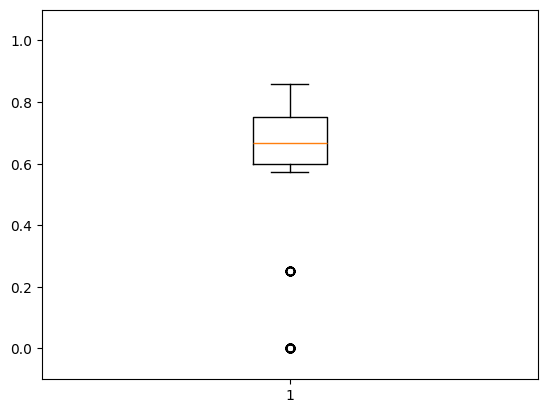

In [88]:
plt.boxplot(accuracies)
plt.ylim((-0.1, 1.1))
plt.show()

# Pairwise anestry relationship evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
SIMULATION_STR = 'n5000_m15_size1000_cov0.05_p15_s2'

GROUND_TRUTH_DIR = f"../data/simulation/ground_truth/{SIMULATION_STR}"
PHERTILIZER_OUTPUT_DIR = f"../data/simulation/phertilizer_output/{SIMULATION_STR}"

mutation_group = pd.read_parquet(f"{GROUND_TRUTH_DIR}/sim_mutation_group.parquet")
mutation_group.set_index('mutation', inplace=True)





In [5]:
df_snv_clusters = pd.read_csv(f"{PHERTILIZER_OUTPUT_DIR}/snv_clusters.csv")
df_snv_clusters['mutation'] = df_snv_clusters['mutation'].str[3:].astype(int)
df_snv_clusters.set_index('mutation', inplace=True)
df_snv_clusters.sort_index(inplace=True)
df_snv_clusters

,cluster
mutation,
0,4
1,7
2,3
3,11
4,3
...,...
15250,7
15251,1
15252,5


In [6]:
df_merged = pd.merge(mutation_group, df_snv_clusters, left_index=True, right_index=True, how='left')
df_merged['cluster'] = df_merged['cluster'].fillna(-1).astype(int)
df_merged

,mutation_group,cluster
mutation,,
0,2,4
1,13,7
2,2,3
3,5,11
4,1,3
...,...,...
15250,13,7
15251,0,1
15252,9,5


In [7]:
pair_counts = df_merged.value_counts(['mutation_group', 'cluster'])
pair_counts

mutation_group  cluster
7                18        992
3                4         982
5                11        975
2                4         899
13               7         856
                          ... 
6                9           1
11              -1           1
12               17          1
                 16          1
13               14          1
Name: count, Length: 69, dtype: int64

In [17]:
total_mutation_groups = int(df_merged['mutation_group'].max()) + 1
total_mutation_groups_pred = int(df_merged['cluster'].max()) + 1
total_mutation_groups, total_mutation_groups_pred

(15, 22)

In [18]:
total_mutations = int(df_merged.index.max()) + 1
total_mutations

15255

In [19]:
import networkx as nx

In [20]:
Tree = pd.read_csv(f"{GROUND_TRUTH_DIR}/sim_tree_edgelist.csv", header=None)
Tree_mut = Tree[~Tree[1].str.startswith('s')]
T_truth = nx.DiGraph()

for index, row in Tree_mut.iterrows():
    parent, child = row[0], row[1]
    T_truth.add_edge(parent, child)

In [21]:
import networkx as nx

T_phert = nx.DiGraph()

edges = []
leaves = []

with open(f"{PHERTILIZER_OUTPUT_DIR}/tree.txt", "r") as f:
    lines = f.readlines()
    
    n_edges = int(lines[0].split()[0])
    
    for line in lines[1:n_edges+1]:
        u, v = map(int, line.split())
        edges.append((u, v))
        T_phert.add_edge(u, v)
    

In [22]:
mutation_group_ancestral_relation = np.zeros((total_mutation_groups, total_mutation_groups), dtype=int)

for i in range(total_mutation_groups):
    for j in range(total_mutation_groups):
        if i == j: continue
        if nx.has_path(T_truth, f'c{i}', f'c{j}'):
            mutation_group_ancestral_relation[i][j] = 1

mutation_group_ancestral_relation

array([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [42]:
us = []
vs = []
rel = []

for i in range(total_mutation_groups):
    for j in range(total_mutation_groups):
        us.append(i)
        vs.append(j)
        if i == j: rel.append(1)
        elif nx.has_path(T_truth, f'c{i}', f'c{j}'): rel.append(3)
        elif nx.has_path(T_truth, f'c{j}', f'c{i}'): rel.append(4)
        else: rel.append(2)

true_ancestry_df = pd.DataFrame({
    'u1': us,
    'v1': vs,
    'rel1': rel 
})

true_ancestry_df

,u1,v1,rel1
0,0,0,1
1,0,1,3
2,0,2,3
3,0,3,3
4,0,4,3
...,...,...,...
220,14,10,2
221,14,11,4
222,14,12,2
223,14,13,2


In [43]:
us = []
vs = []
rel = []

for i in range(total_mutation_groups_pred):
    for j in range(total_mutation_groups_pred):
        us.append(i)
        vs.append(j)
        if i == j: rel.append(1)
        elif nx.has_path(T_phert, i, j): rel.append(3)
        elif nx.has_path(T_phert, j, i): rel.append(4)
        else: rel.append(2)

pred_ancestry_df = pd.DataFrame({
    'u2': us,
    'v2': vs,
    'rel2': rel 
})

pred_ancestry_df

,u2,v2,rel2
0,0,0,1
1,0,1,3
2,0,2,3
3,0,3,3
4,0,4,3
...,...,...,...
479,21,17,2
480,21,18,4
481,21,19,4
482,21,20,2


In [44]:
merged_ancestry = pd.merge(true_ancestry_df, pred_ancestry_df, how='cross')
merged_ancestry

,u1,v1,rel1,u2,v2,rel2
0,0,0,1,0,0,1
1,0,0,1,0,1,3
2,0,0,1,0,2,3
3,0,0,1,0,3,3
4,0,0,1,0,4,3
...,...,...,...,...,...,...
108895,14,14,1,21,17,2
108896,14,14,1,21,18,4
108897,14,14,1,21,19,4
108898,14,14,1,21,20,2


In [45]:
merged_ancestry_ = pd.merge(merged_ancestry, pair_counts, left_on=['u1', 'u2'], right_on=['mutation_group', 'cluster'], how='left')
merged_ancestry_.rename(columns={'count': 'u1u2'}, inplace=True)
merged_ancestry_ = pd.merge(merged_ancestry_, pair_counts, left_on=['v1', 'v2'], right_on=['mutation_group', 'cluster'], how='left')
merged_ancestry_.rename(columns={'count': 'v1v2'}, inplace=True)
merged_ancestry_ = merged_ancestry_.fillna(0)
merged_ancestry_

,u1,v1,rel1,u2,v2,rel2,u1u2,v1v2
0,0,0,1,0,0,1,105.0,105.0
1,0,0,1,0,1,3,105.0,596.0
2,0,0,1,0,2,3,105.0,268.0
3,0,0,1,0,3,3,105.0,62.0
4,0,0,1,0,4,3,105.0,0.0
...,...,...,...,...,...,...,...,...
108895,14,14,1,21,17,2,0.0,0.0
108896,14,14,1,21,18,4,0.0,0.0
108897,14,14,1,21,19,4,0.0,0.0
108898,14,14,1,21,20,2,0.0,0.0


In [47]:
merged_ancestry_["prod"] = merged_ancestry_["u1u2"] * merged_ancestry_["v1v2"]
merged_ancestry_

,u1,v1,rel1,u2,v2,rel2,u1u2,v1v2,prod
0,0,0,1,0,0,1,105.0,105.0,11025.0
1,0,0,1,0,1,3,105.0,596.0,62580.0
2,0,0,1,0,2,3,105.0,268.0,28140.0
3,0,0,1,0,3,3,105.0,62.0,6510.0
4,0,0,1,0,4,3,105.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
108895,14,14,1,21,17,2,0.0,0.0,0.0
108896,14,14,1,21,18,4,0.0,0.0,0.0
108897,14,14,1,21,19,4,0.0,0.0,0.0
108898,14,14,1,21,20,2,0.0,0.0,0.0


In [52]:
merged_ancestry_["match"] = (merged_ancestry_["rel1"] == merged_ancestry_["rel2"]).astype(int)
merged_ancestry_

,u1,v1,rel1,u2,v2,rel2,u1u2,v1v2,prod,match
0,0,0,1,0,0,1,105.0,105.0,11025.0,1
1,0,0,1,0,1,3,105.0,596.0,62580.0,0
2,0,0,1,0,2,3,105.0,268.0,28140.0,0
3,0,0,1,0,3,3,105.0,62.0,6510.0,0
4,0,0,1,0,4,3,105.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
108895,14,14,1,21,17,2,0.0,0.0,0.0,0
108896,14,14,1,21,18,4,0.0,0.0,0.0,0
108897,14,14,1,21,19,4,0.0,0.0,0.0,0
108898,14,14,1,21,20,2,0.0,0.0,0.0,0


In [54]:
correct_pairs = (merged_ancestry_["prod"] * merged_ancestry_["match"]).sum()
print(correct_pairs)

197598096.0


In [55]:
total_pairs = merged_ancestry_["prod"].sum()
total_pairs

np.float64(213685924.0)

In [56]:
correct_pairs / total_pairs

np.float64(0.9247127386827781)

In [62]:
!ls '../data/simulation/scope_output_kmeans/n5000_m15_size1000_cov0.05_p15_s2/solution_0'

ls: cannot access '../data/simulation/scope_output_kmeans/n5000_m15_size1000_cov0.05_p15_s2/solution_0': No such file or directory


In [64]:
!ls '../data/simulation/scope_input_kmeans/n5000_m15_size1000_cov0.05_p15_s2/'

benchmark			  err.log      F_plus.csv
clone_cluster_cell_fractions.svg  F_bar.csv    log
clone_sizes.csv			  F_minus.csv  silhouette_scores.svg


In [65]:
B_mat = pd.read_csv(f"../data/simulation/scope_output/{SIMULATION_STR}/solution_0/B.csv", index_col=0)
B_mat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
import sys
sys.path.append('..')

In [67]:
from src.phylogeny_utils import generate_perfect_phylogeny

In [69]:
solT, _ = generate_perfect_phylogeny(B_mat)

In [71]:
solT.edges

OutEdgeView([('root', '1'), ('1', '0'), ('0', '2'), ('0', '5'), ('2', '3'), ('3', '4'), ('4', '6'), ('5', '7'), ('5', '8'), ('6', '9'), ('7', '12'), ('8', '10'), ('9', '11'), ('9', '13'), ('11', '14')])

In [89]:
mutation_group_ancestral_relation_scope = np.zeros((total_mutation_groups, total_mutation_groups), dtype=int)

for i in range(total_mutation_groups):
    for j in range(total_mutation_groups):
        if i == j: continue
        if nx.has_path(solT, str(i), str(j)):
            mutation_group_ancestral_relation_scope[i][j] = 1

mutation_group_ancestral_relation_scope

array([[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [90]:
us = []
vs = []
rel = []

for i in range(total_mutation_groups):
    for j in range(total_mutation_groups):
        us.append(i)
        vs.append(j)
        if i == j: rel.append(1)
        elif nx.has_path(solT, str(i), str(j)): rel.append(3)
        elif nx.has_path(solT, str(j), str(i)): rel.append(4)
        else: rel.append(2)

pred_scope_df = pd.DataFrame({
    'u3': us,
    'v3': vs,
    'rel3': rel 
})

pred_scope_df

,u3,v3,rel3
0,0,0,1
1,0,1,4
2,0,2,3
3,0,3,3
4,0,4,3
...,...,...,...
220,14,10,2
221,14,11,4
222,14,12,2
223,14,13,2


In [91]:
merged_ancestry = pd.merge(true_ancestry_df, pred_scope_df, how='cross')
merged_ancestry

,u1,v1,rel1,u3,v3,rel3
0,0,0,1,0,0,1
1,0,0,1,0,1,4
2,0,0,1,0,2,3
3,0,0,1,0,3,3
4,0,0,1,0,4,3
...,...,...,...,...,...,...
50620,14,14,1,14,10,2
50621,14,14,1,14,11,4
50622,14,14,1,14,12,2
50623,14,14,1,14,13,2


In [92]:
mutation_group_sizes = mutation_group.value_counts().reset_index()
mutation_group_sizes.columns = ['mutation_group', 'count']
mutation_group_sizes['cluster'] = mutation_group_sizes['mutation_group']
mutation_group_sizes

,mutation_group,count,cluster
0,8,1082,8
1,10,1060,10
2,5,1045,5
3,0,1031,0
4,2,1030,2
5,4,1024,4
6,7,1019,7
7,12,1005,12
8,11,1001,11
9,3,1001,3


In [93]:
merged_ancestry_ = pd.merge(merged_ancestry, mutation_group_sizes, left_on=['u1', 'u3'], right_on=['mutation_group', 'cluster'], how='left')
merged_ancestry_.rename(columns={'count': 'u1u3'}, inplace=True)
merged_ancestry_ = pd.merge(merged_ancestry_, mutation_group_sizes, left_on=['v1', 'v3'], right_on=['mutation_group', 'cluster'], how='left')
merged_ancestry_.rename(columns={'count': 'v1v3'}, inplace=True)
merged_ancestry_ = merged_ancestry_.fillna(0)
merged_ancestry_

,u1,v1,rel1,u3,v3,rel3,mutation_group_x,u1u3,cluster_x,mutation_group_y,v1v3,cluster_y
0,0,0,1,0,0,1,0.0,1031.0,0.0,0.0,1031.0,0.0
1,0,0,1,0,1,4,0.0,1031.0,0.0,0.0,0.0,0.0
2,0,0,1,0,2,3,0.0,1031.0,0.0,0.0,0.0,0.0
3,0,0,1,0,3,3,0.0,1031.0,0.0,0.0,0.0,0.0
4,0,0,1,0,4,3,0.0,1031.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
50620,14,14,1,14,10,2,14.0,987.0,14.0,0.0,0.0,0.0
50621,14,14,1,14,11,4,14.0,987.0,14.0,0.0,0.0,0.0
50622,14,14,1,14,12,2,14.0,987.0,14.0,0.0,0.0,0.0
50623,14,14,1,14,13,2,14.0,987.0,14.0,0.0,0.0,0.0


In [94]:
merged_ancestry_["prod"] = merged_ancestry_["u1u3"] * merged_ancestry_["v1v3"]
merged_ancestry_

,u1,v1,rel1,u3,v3,rel3,mutation_group_x,u1u3,cluster_x,mutation_group_y,v1v3,cluster_y,prod
0,0,0,1,0,0,1,0.0,1031.0,0.0,0.0,1031.0,0.0,1062961.0
1,0,0,1,0,1,4,0.0,1031.0,0.0,0.0,0.0,0.0,0.0
2,0,0,1,0,2,3,0.0,1031.0,0.0,0.0,0.0,0.0,0.0
3,0,0,1,0,3,3,0.0,1031.0,0.0,0.0,0.0,0.0,0.0
4,0,0,1,0,4,3,0.0,1031.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50620,14,14,1,14,10,2,14.0,987.0,14.0,0.0,0.0,0.0,0.0
50621,14,14,1,14,11,4,14.0,987.0,14.0,0.0,0.0,0.0,0.0
50622,14,14,1,14,12,2,14.0,987.0,14.0,0.0,0.0,0.0,0.0
50623,14,14,1,14,13,2,14.0,987.0,14.0,0.0,0.0,0.0,0.0


In [98]:
merged_ancestry_["match"] = (merged_ancestry_["rel1"] == merged_ancestry_["rel3"]).astype(int)
merged_ancestry_

,u1,v1,rel1,u3,v3,rel3,mutation_group_x,u1u3,cluster_x,mutation_group_y,v1v3,cluster_y,prod,match
0,0,0,1,0,0,1,0.0,1031.0,0.0,0.0,1031.0,0.0,1062961.0,1
1,0,0,1,0,1,4,0.0,1031.0,0.0,0.0,0.0,0.0,0.0,0
2,0,0,1,0,2,3,0.0,1031.0,0.0,0.0,0.0,0.0,0.0,0
3,0,0,1,0,3,3,0.0,1031.0,0.0,0.0,0.0,0.0,0.0,0
4,0,0,1,0,4,3,0.0,1031.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50620,14,14,1,14,10,2,14.0,987.0,14.0,0.0,0.0,0.0,0.0,0
50621,14,14,1,14,11,4,14.0,987.0,14.0,0.0,0.0,0.0,0.0,0
50622,14,14,1,14,12,2,14.0,987.0,14.0,0.0,0.0,0.0,0.0,0
50623,14,14,1,14,13,2,14.0,987.0,14.0,0.0,0.0,0.0,0.0,0


In [100]:
total = merged_ancestry_["prod"].sum()
total

np.float64(232715025.0)

In [103]:
np.sqrt(232715025.0)

np.float64(15255.0)

In [101]:
correct = (merged_ancestry_["prod"] * merged_ancestry_["match"]).sum()
correct

np.float64(230659211.0)

In [102]:
correct / total

np.float64(0.9911659593101048)

In [119]:
mutation_to_group = mutation_group["mutation_group"].to_numpy()

mutation_ancestral_relation = mutation_group_ancestral_relation[mutation_to_group[:, None], mutation_to_group[None, :]]

mutation_ancestral_relation

array([[0, 1, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 0]], shape=(15255, 15255))

In [120]:
mutation_ancestral_relation.T

array([[0, 0, 0, ..., 0, 0, 1],
       [1, 0, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], shape=(15255, 15255))

In [121]:
same_group = mutation_to_group[:, None] == mutation_to_group[None, :]
same_group.astype(int)

array([[1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], shape=(15255, 15255))

In [22]:
!ls "../data/simulation/phertilizer_output/n5000_m5_size1000_cov0.1_p15_s0"

benchmark	   err.log  snv_clusters.csv  tree.txt
cell_clusters.csv  log	    tree.png


In [23]:
!cat "../data/simulation/phertilizer_output/n5000_m5_size1000_cov0.1_p15_s0/tree.txt"

8 #edges
0 1
1 2
2 3
2 6
3 4
3 5
6 7
6 8
4 #leaves
4
5
7
8


In [29]:
T_phert.edges

OutEdgeView([(0, 1), (1, 2), (2, 3), (3, 4), (3, 11), (4, 5), (11, 12), (5, 6), (12, 13), (12, 18), (6, 7), (6, 8), (13, 14), (13, 15), (18, 19), (8, 9), (8, 10), (15, 16), (15, 17), (19, 20), (19, 21)])

In [147]:
mutation_group_ancestral_relation_pred = np.zeros((total_mutation_groups_pred, total_mutation_groups_pred))

for i in range(total_mutation_groups_pred):
    for j in range(total_mutation_groups_pred):
        if i == j: continue
        if nx.has_path(T_phert, i, j):
            mutation_group_ancestral_relation_pred[i][j] = 1

mutation_group_ancestral_relation_pred

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [123]:
def form_mutation_ancestry(mutation_group, mutation_group_ancestral_relation):
    mutation_to_group = mutation_group["cluster"].to_numpy()
    mutation_ancestral_relation = mutation_group_ancestral_relation[mutation_to_group[:, None], mutation_to_group[None, :]]
    same_group = (mutation_to_group[:, None] == mutation_to_group[None, :]).astype(int)

    indices = mutation_group.index

    Ap = np.zeros((total_mutations, total_mutations))
    Ap[np.ix_(indices, indices)] = mutation_ancestral_relation

    Sp = np.zeros((total_mutations, total_mutations))
    Sp[np.ix_(indices, indices)] = same_group

    
    return Ap, Ap.T, Sp

In [124]:
Ap, Apt, Sp = form_mutation_ancestry(df_snv_clusters, mutation_group_ancestral_relation_pred)

In [125]:
Ap.shape

(15255, 15255)

In [127]:
mutation_ancestral_relation = np.triu(mutation_ancestral_relation)
same_group = np.triu(same_group)

In [130]:
mutation_ancestral_relation.shape

(15255, 15255)

In [ ]:
Apm = Ap[mutation_ancestral_relation == 1]
Apm

array([1., 0., 1., ..., 1., 1., 1.], shape=(30065451,))

In [18]:
mutation_ancestral_relation = np.zeros((total_mutations, total_mutations))

## 0: same mutation, 1: same mutation group, 2: i -> j, 3: j -> i, 4 -> disjoint

for i in range(total_mutations):
    for j in range(total_mutations):

        if i == j: continue

        mutation_group_i = mutation_group.loc[i, 'mutation_group']
        mutation_group_j = mutation_group.loc[i, 'mutation_group']

        if mutation_group_i == mutation_group_j:
            mutation_ancestral_relation[i][j] = 1
            continue

        if nx.has_path(T_truth, f'c{i}', f'c{j}'):
            mutation_ancestral_relation[i][j] = 2
            continue

        if nx.has_path(T_truth, f'c{j}', f'c{i}'):
            mutation_ancestral_relation[i][j] = 3
            continue

        mutation_ancestral_relation[i][j] = 4


mutation_ancestral_relation

KeyboardInterrupt: 